# Tutorial 1: Basic Usage

This is the basics of using ysoisochrone

## Installation

The easiest way to install this package is using terminal, and change directory to the root direcotry of this package (where the `setup.py` exists).

```bash 
pip install .
```

which should install the necessary dependencies.

First make sure you have successfully installed the package. You can find out this by trying to import

In [2]:
import ysoisochrone

When using the package for the first time, it will try to download the isochrones from online sources, so make sure you also have internet access. You might need to download some large files ($\sim 1\,$GB) for using the isochrones from certain models (such as PARSEC), so you also need to make sure you have a few GB left in the disk where you need to store the data.

By default, the code will create a folder called `isochrones_data` in the same directory that you are running the `Python` script. You can also change this by editing the `save_dir` argument in the `download_xxx` functions.

First, let's try to download the track from Baraffe et al. (2015)

In [2]:
ysoisochrone.utils.download_baraffe_tracks()

Downloading: 100%|██████████████████████████████████████████████| 1.35M/1.35M [00:02<00:00, 549kB/s]


Downloaded isochrones_data/Baraffe2015/BHAC15_tracks+structure
If you end up using the Baraffe et al. (2015) tracks, please cite from: https://ui.adsabs.harvard.edu/abs/2015A%26A...577A..42B/abstract


1


**NOTE**. 
If you want to store the data to a different directory, you can use

``` Python
save_dir_yourpath = 'Your_prefered_path'
ysoisochrone.utils.download_baraffe_tracks(save_dir=save_dir_yourpath)
```

## Prepare your own data

Then, you need to prepare your own data. The data needs to be in the format of `pandas.DataFrame` and with following columns `['Source', 'Teff[K]', 'e_Teff[K]', 'Luminosity[Lsun]', 'e_Luminosity[Lsun]']`. 

- `'Source'` is the list of source names. It can be just the ID numbers you prefer.
- `'Teff[K]'` is the effective temperature in the unit of Kelvin.
- and `'e_Teff[K]'` is the associated uncertainties. 
- `'Luminosity[Lsun]'` is the bolometric luminosities of these targets un the unit of solar luminosity. 
- and `'e_Luminosity[Lsun]'` is their uncertainties.

The easiest way to do so is to create a `.csv` file using EXCEL or similar software, and this file includes these columns, and then you can utilize `pandas` to read in this file. Later you use this as an input.

Here we prepared an example file called `'example_targets.csv'` in this tutorial.

In [3]:
import numpy as np
import pandas as pd

df_prop = pd.read_csv('example_targets.csv')

df_prop

,Source,Teff[K],e_Teff[K],Luminosity[Lsun],e_Luminosity[Lsun]
0,Sz65,4060,187.0,0.869,0.3623
1,Sz71,3632,167.0,0.327,0.1420
2,J16124373-3815031,3705,171.0,0.390,0.2691
3,Sz72,3560,164.0,0.272,0.1160
4,Sz77,4060,187.0,0.593,0.2428
5,J16085324-3914401,3415,79.0,0.198,0.1477
6,Sz131,3415,79.0,0.150,0.0583
7,Sz66,3415,79.0,0.216,0.0920
8,Sz95,3415,79.0,0.267,0.1842
9,V1094Sco,4205,193.0,1.210,0.8633


**TIPS** `pandas.DataFrame` is a very versatile class. If you only have a few targets and do not wish to import a chunky `.csv` file or you just want to do everything in one script. You can always define it here utlizing a Dictionary.

In [4]:
"""
# An alternative way to have a df_prop

df_prop = pd.DataFrame({
    'Source': ['Sz65'],
    'Teff[K]': np.array([4060.0]),
    'e_Teff[K]': np.array([187.0]),
    'Luminosity[Lsun]': np.array([0.869]),
    'e_Luminosity[Lsun]': np.array([0.3623])
})
"""

"\n# An alternative way to have a df_prop\n\ndf_prop = pd.DataFrame({\n    'Source': ['Sz65'],\n    'Teff[K]': np.array([4060.0]),\n    'e_Teff[K]': np.array([187.0]),\n    'Luminosity[Lsun]': np.array([0.869]),\n    'e_Luminosity[Lsun]': np.array([0.3623])\n})\n"

You can overplot them on the top of the isochrones in the Hertzsprung–Russell diagram (HR diagram).

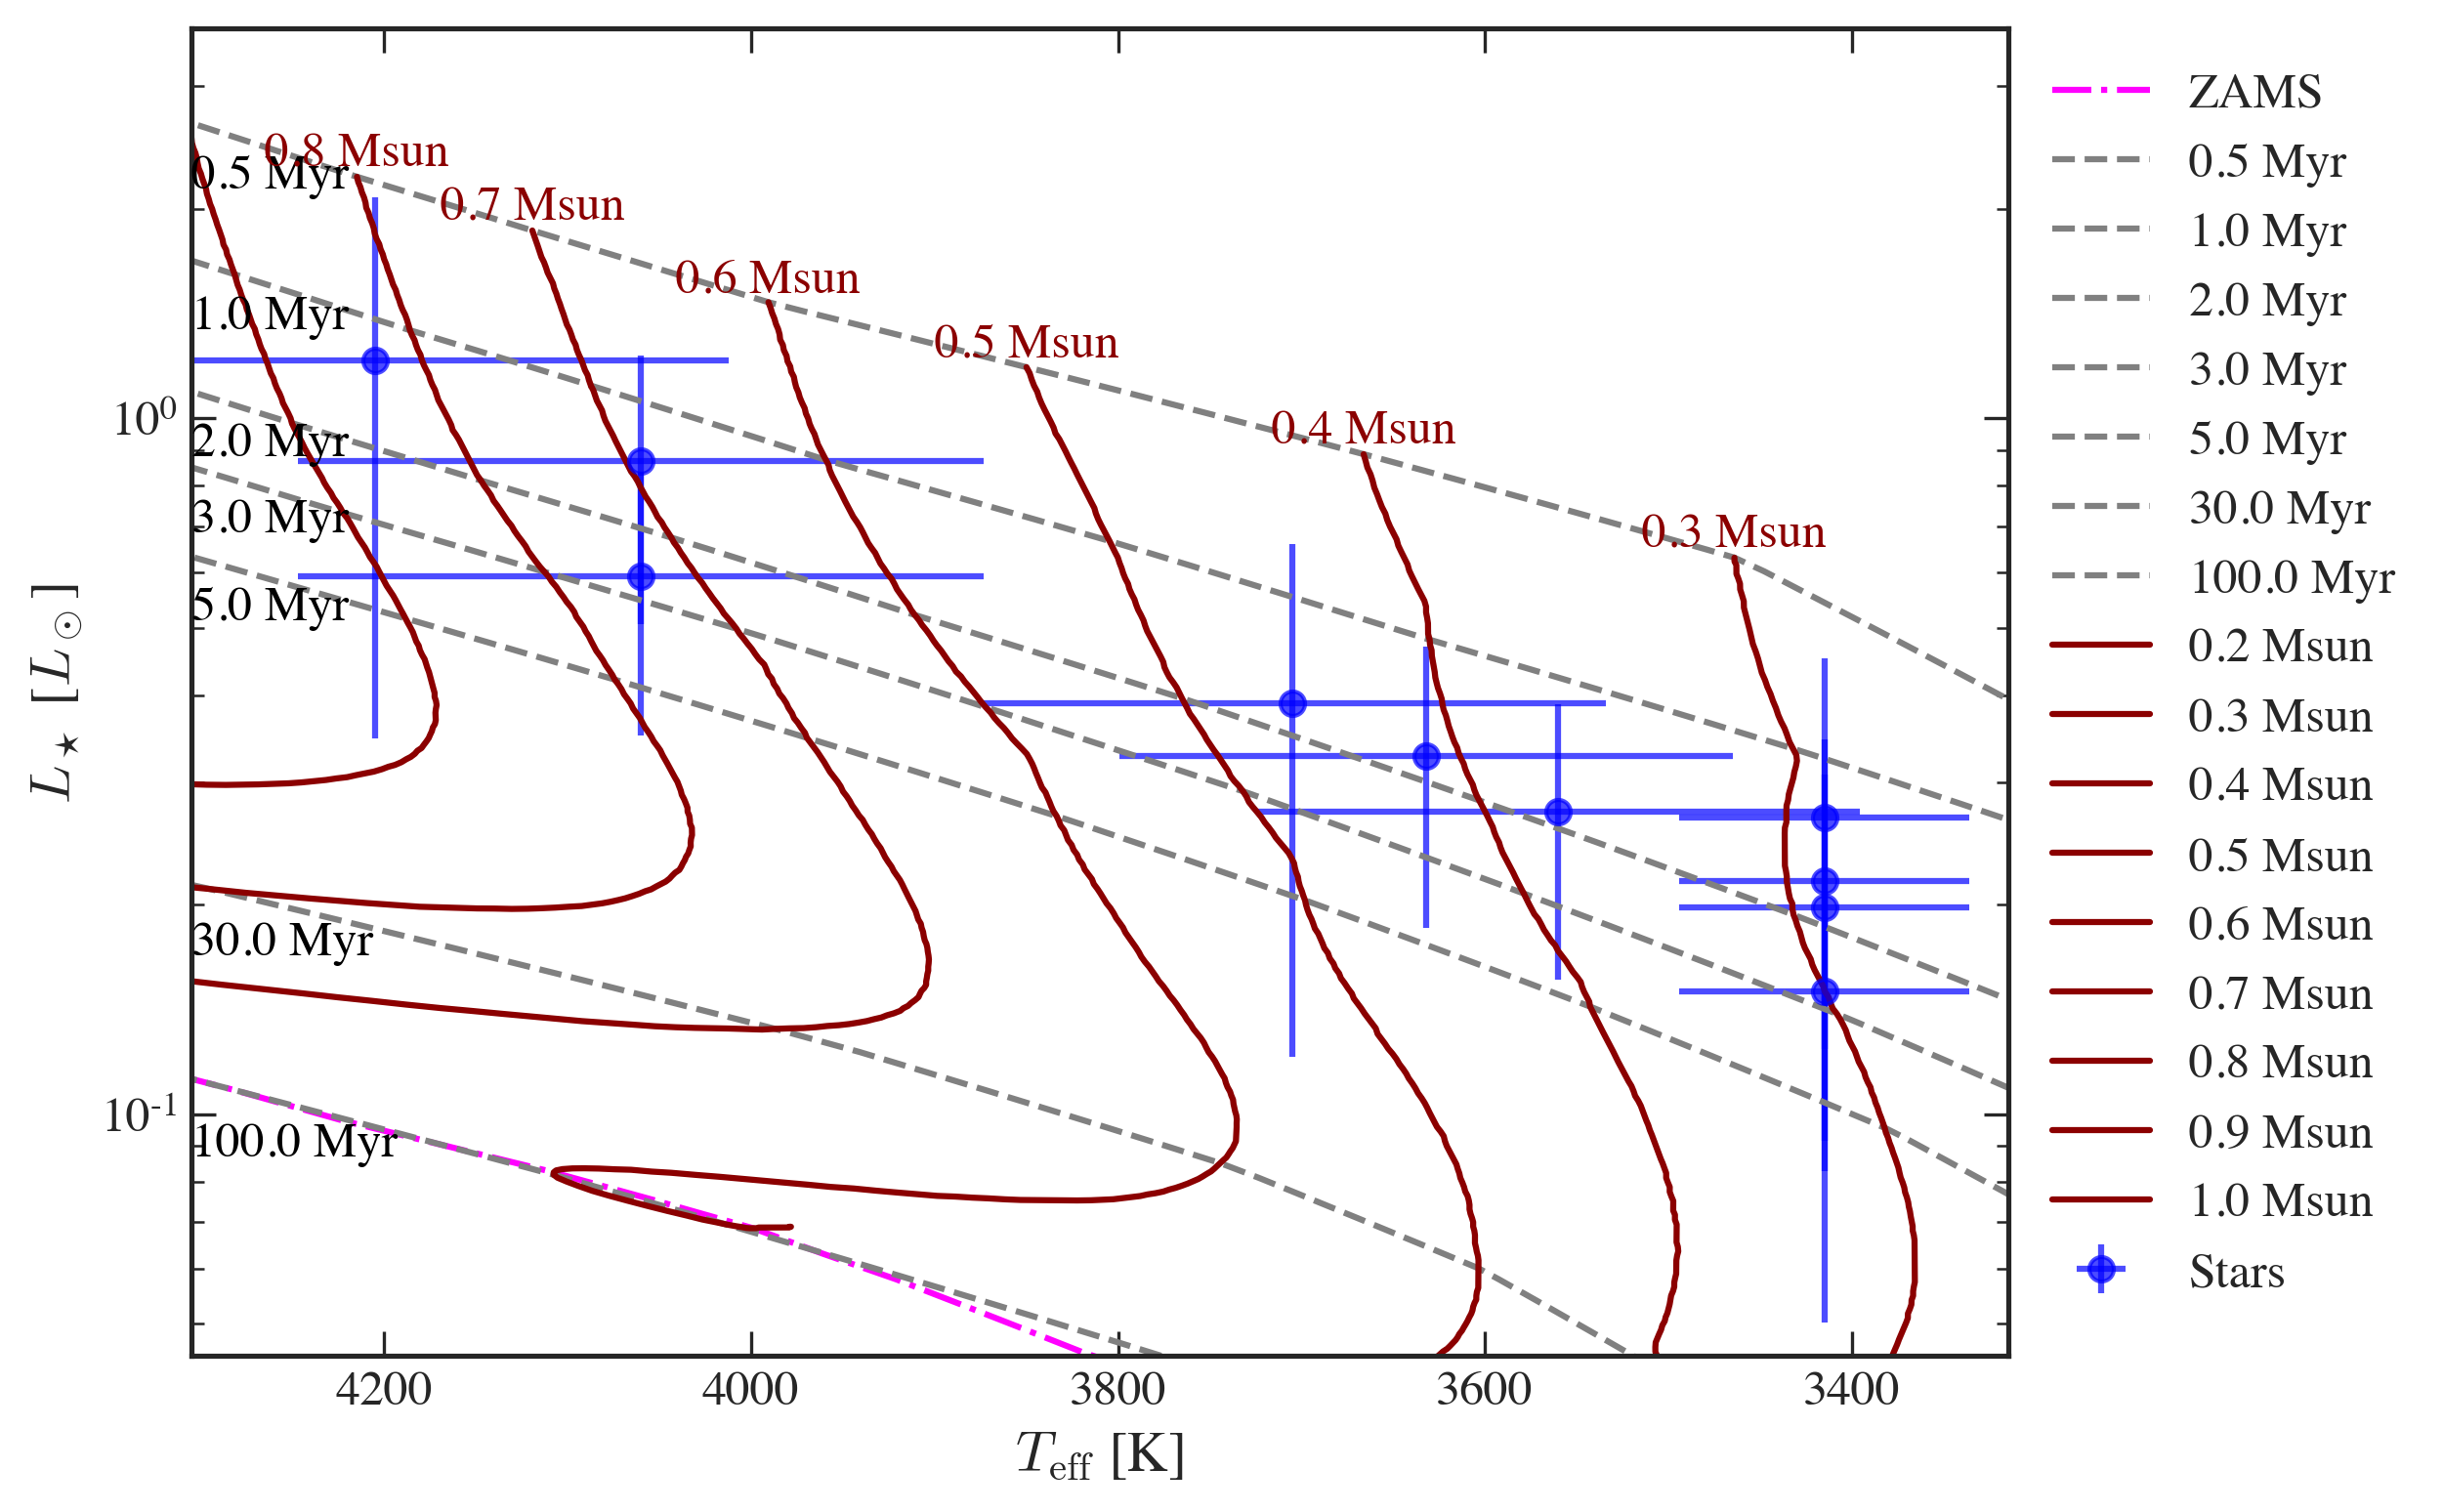

1

In [5]:
isochrone = ysoisochrone.isochrone.Isochrone()
isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop)

Here the blue points with errorbars are the stars with uncertainties; dark red solid lines are the stellar evolutionary tracks for different stellar masses; dashed grey lines are the isochorones; We also have an algrithm to automatically detect the zero-age-main-sequence (ZAMS) curve in the tracks, and that is shown as magenta dot-dashed line. 

**NOTE** *On each track, the points that are older than the ZAMS will be ignored in the age/mass determination later.*

## Estimate Mass and Ages

Then, to estimate their masses and ages using the Bayesian inference approach

In [6]:
best_logmass_output, best_logage_output, lmass_all, lage_all =\
    ysoisochrone.bayesian.derive_stellar_mass_age(df_prop, model='Baraffe2015')

100%|██████████| 10/10 [00:00<00:00, 41.37it/s]


The model here is for calling different evolutionary tracks. The choices are: 'Baraffe_n_Feiden', 'Baraffe2015', 'Feiden2016', 'PARSEC_v2p0' (same as 'PARSEC'), 'PARSEC_v1p2',  'MIST_v1p2' (same as 'MIST') or 'custome'. If you want to use your own customized isochrone, you need to set the `model = 'custome'`, and also provide the absolute directory for the isochrone matrix file `isochrone_mat_file`. See [use your own customized isochrone](../docs/source/use_your_own_isochrone.md) for details. We summarize all the available_models in [model](../docs/source/models.md).

The outputs are:
(a) `best_logmass_output` (log10 of mass in the unit of solar masses), `best_logage_output` (log10 of age in the unit of yrs) are the arrays that includes the best derived values and their lower and upper boundaries from the 68% confidence intervals. 
(b) `lmass_all` and `lage_all` are the distributions of the likelihood functions for each source; they could be used to estimate the medians based on the likelihood distributions.

An example of saving these `output` numbers are

In [7]:
df_output_mass = pd.DataFrame(np.array(best_logmass_output), columns=['logmass[Msun]', 'lw_logmass[Msun]', 'up_logmass[Msun]'])
df_output_age = pd.DataFrame(np.array(best_logage_output), columns=['logage[yrs]', 'lw_logage[yrs]', 'up_logage[yrs]']) 
df_output = pd.concat([df_prop, df_output_mass, df_output_age], axis=1)

df_output.loc[:, 'masses[Msun]'] = 10**df_output.loc[:, 'logmass[Msun]']
df_output.loc[:, 'lw_masses[Msun]'] = 10**df_output.loc[:, 'lw_logmass[Msun]']
df_output.loc[:, 'up_masses[Msun]'] = 10**df_output.loc[:, 'up_logmass[Msun]']

df_output.loc[:, 'age[Myrs]'] = 10**df_output.loc[:, 'logage[yrs]']/1e6
df_output.loc[:, 'lw_age[Myrs]'] = 10**df_output.loc[:, 'lw_logage[yrs]']/1e6
df_output.loc[:, 'up_age[Myrs]'] = 10**df_output.loc[:, 'up_logage[yrs]']/1e6

# Then you can save this output file
df_output.to_csv('example_targets_o.csv', index=False)